# Deep Learning-II
## 11/21/2024

<a href="?print-pdf">print view</a>

<a href="./Lecture22-DeepLearning-II-v2.ipynb">notebook</a>

# Project presentations

##  Present a biology/medicine themed paper that incorporates 'substantial' python implementation. 

### Dates: December 5 and December 10

**Papers can be from diverse areas of computational biology and medicine including but not limited to: systems biology, bioinformatics, computational structural biology, computational medicine, bioimaging, etc.**

**Details** 
1. You can work in groups of no more than 3 people.
2. All three group members will be required to present.
3. The presentation should be 12 mins + 3 mins questions.
4. The presentation should include:
    - What the paper is about.
    - A clear description of the python based coding done in the paper (including any packages you found interesting).
    - How that work helped the authors achieve the results they presented in the paper

# OMET Teaching Survey

Please fill out.

# Perceptron

**activation function:** $\sigma$

$$output = \sigma(w\cdot x + b)$$
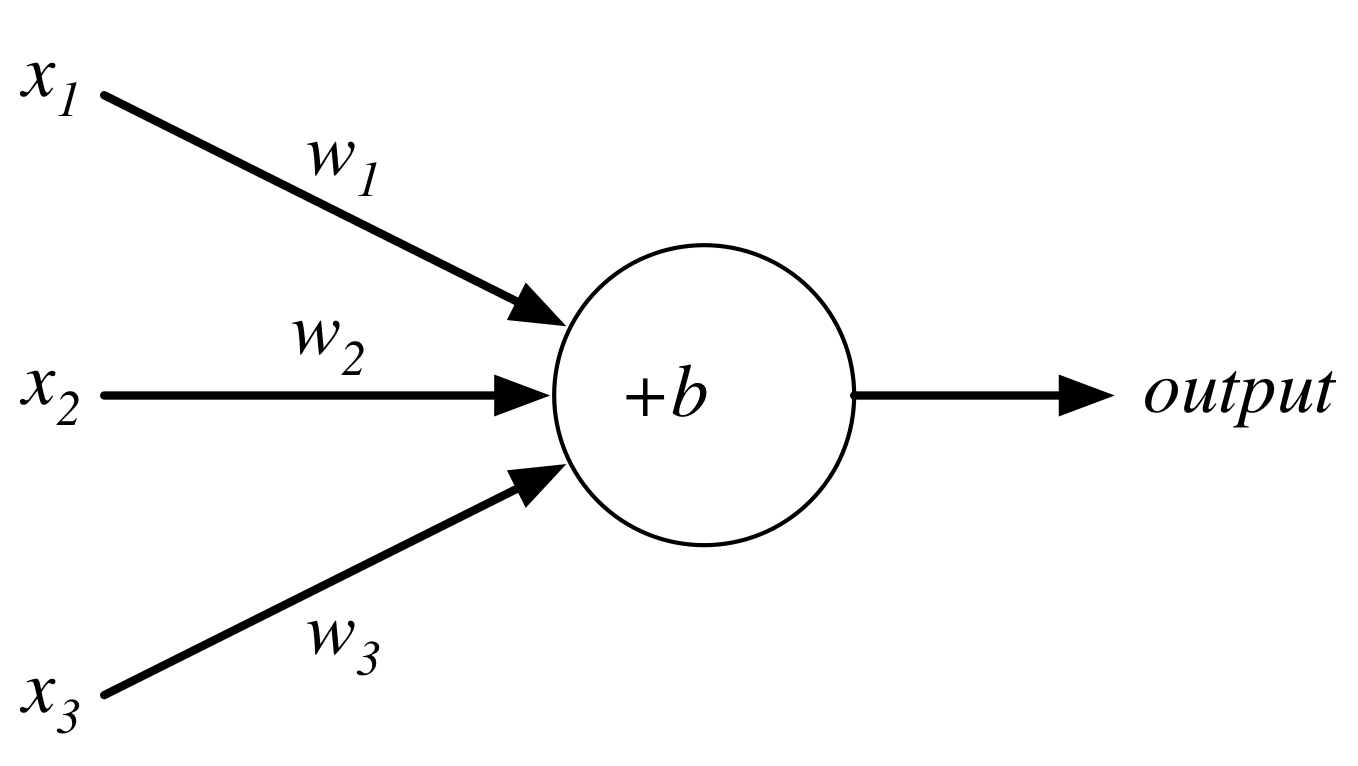

# Networks

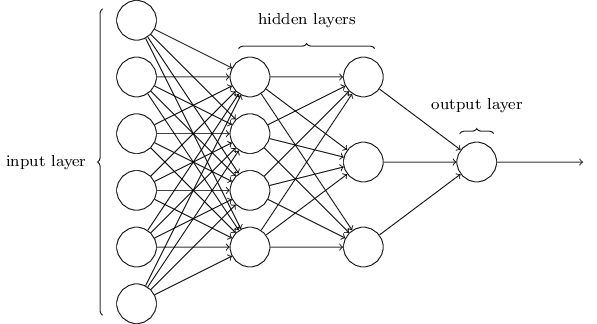

Terminology alert: networks of neurons are sometimes called *multilayer perceptrons*, despite not using the step function.

# Neural Networks

The <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">universal approximation theorem</a> says that, if some reasonable assumptions are made, a feedforward neural network with a finite number of nodes can approximate any continuous function to within a given error $\epsilon$ over a bounded input domain.

The theorem says nothing about the design (number of nodes/layers) of such a network.

The theorem says nothing about the *learnability* of the weights of such a network.

These are open theoretical questions.

Given a network design, how are we going to learn weights for the neurons?

# Loss Functions

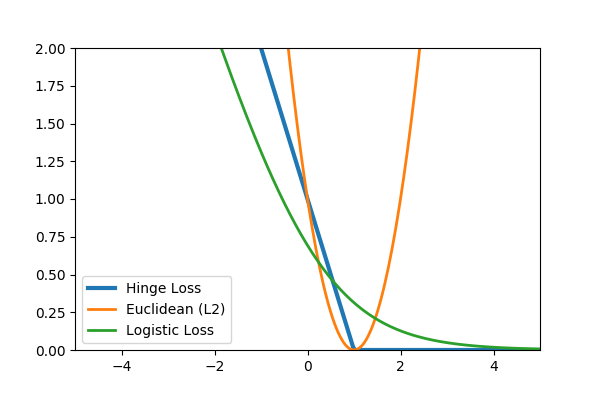

x = 1 is a correct prediction, x = -1 a wrong prediction

## Training neural networks comprises of the following steps
 - **A forward pass, making predictions on training data.**
 - **A loss function measures the error of the model’s predictions during that forward pass.**
 - **Backpropagation of error, or a backward pass, to calculate the partial derivatives of the loss function.**
 - **Gradient descent, to update model weights.**

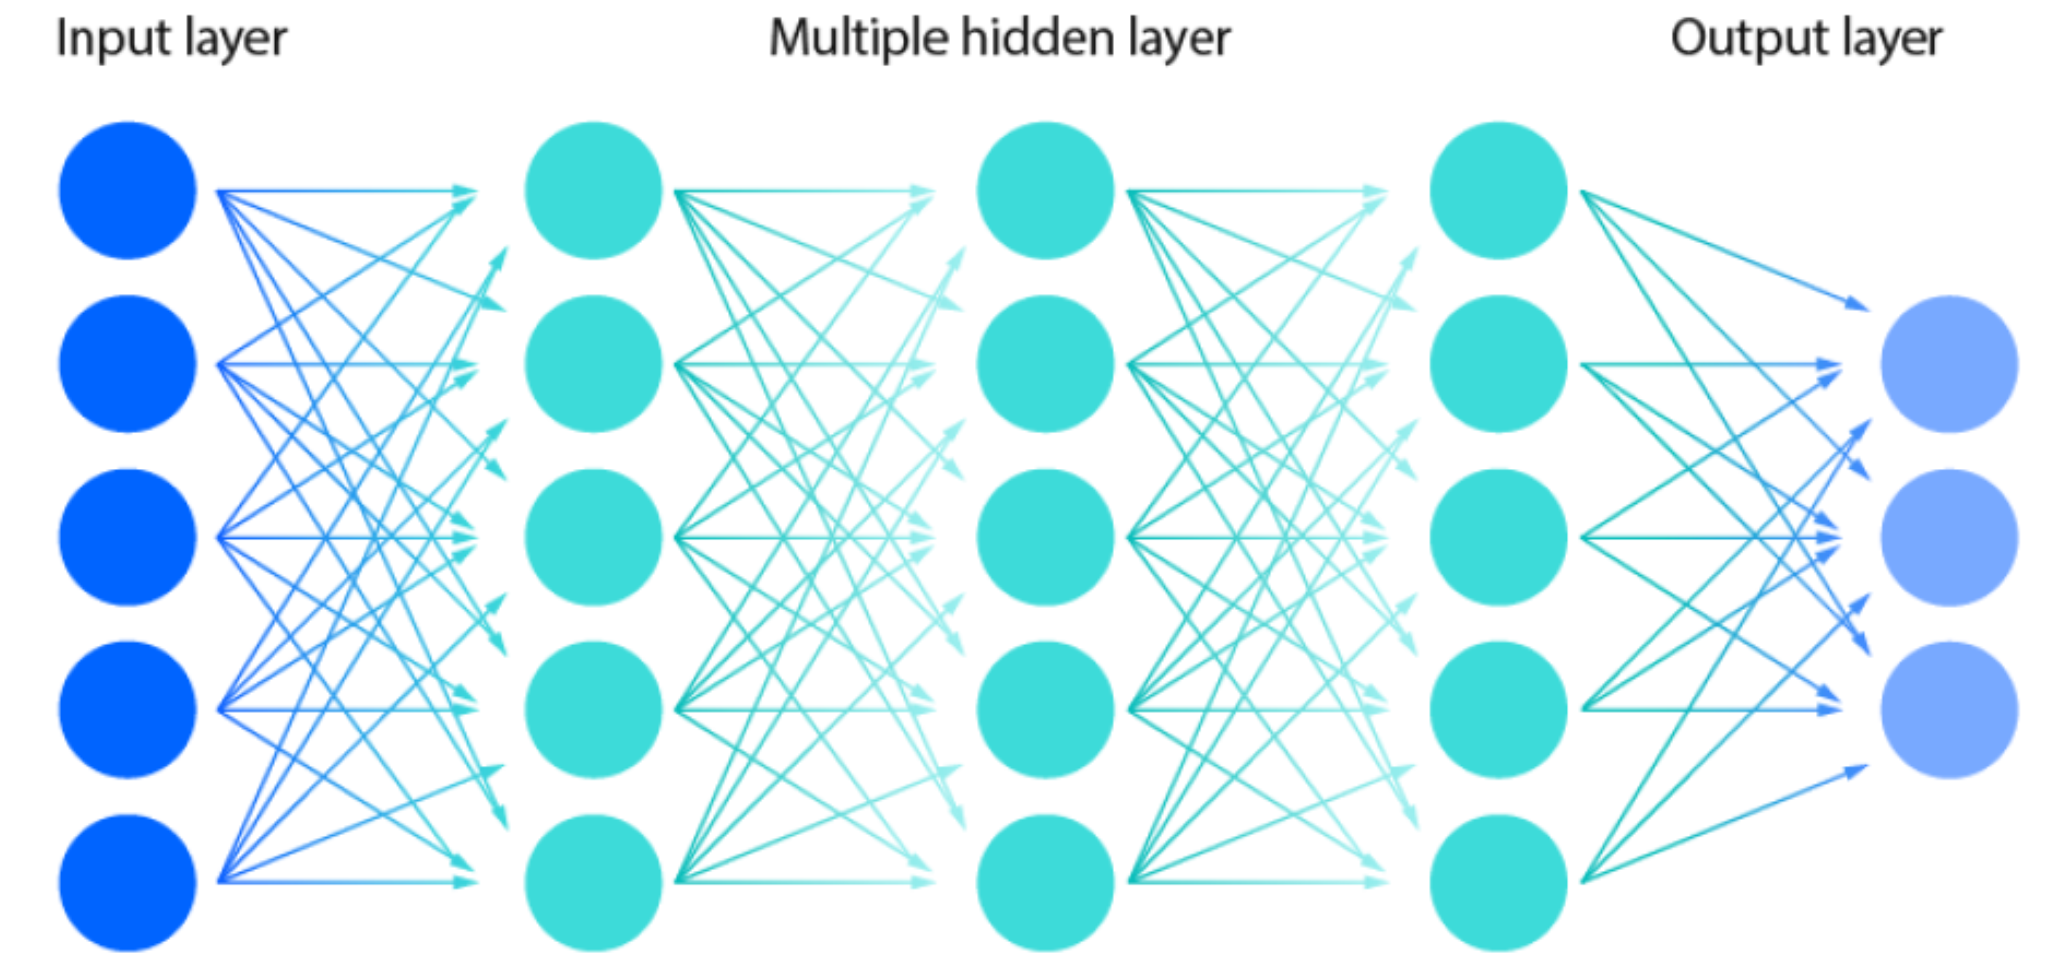

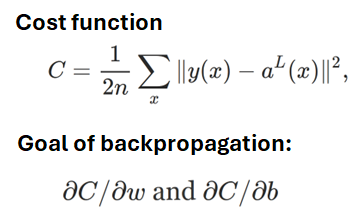

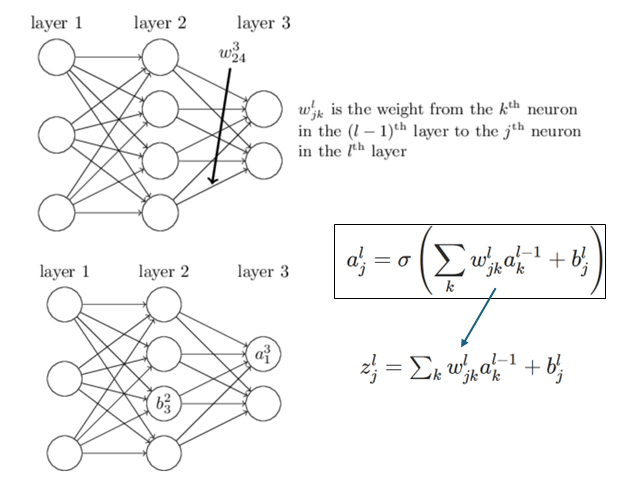

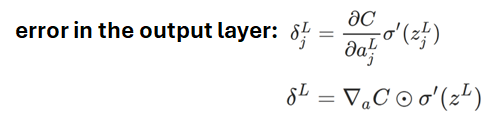

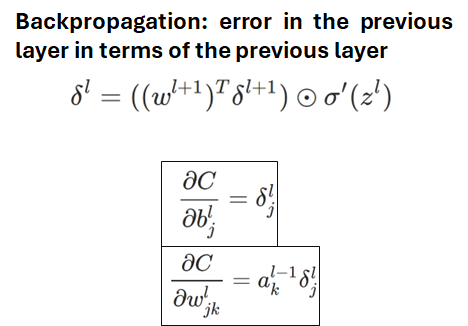

# Backpropagation

Backpropagation is an efficient algorithm for computing the partial derivatives needed by the gradient descent update rule.  For a training example $x$ and loss function $C$ in a network with $N$ layers:

1. **Feedforward**.  For each layer $l$ compute
 $$a^{l} = \sigma(z^{l})$$
 where $z$ is the weighted input and $a$ is the activation induced by $x$ (these are vectors representing all nodes of layer $l$).
 
2. **Compute output error**
$$\delta^{N} = \nabla_a C \odot \sigma'(z^N)$$
where $ \nabla_a C_j = \partial C / \partial a^N_j$, the gradient of the loss with respect to the output activations. $\odot$ is the elementwise product.

3. **Backpropagate the error**
$$\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$$
  
4. **Calculate gradients**
$$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j \text{ and } \frac{\partial C}{\partial b^l_j} = \delta^l_j$$

# Stochastic Gradient Descent

Randomly select $m$ training examples $X_j$ and compute the gradient of the loss function ($L$).  Update weights and biases with a given _learning rate_  $\eta$.
$$ w_k' = w_k-\frac{\eta}{m}\sum_j^m 
\frac{\partial C_{X_j}}{\partial w_k}$$
$$b_l' = b_l-\frac{\eta}{m}
  \sum_j^m \frac{\partial C_{X_j}}{\partial b_l}
$$
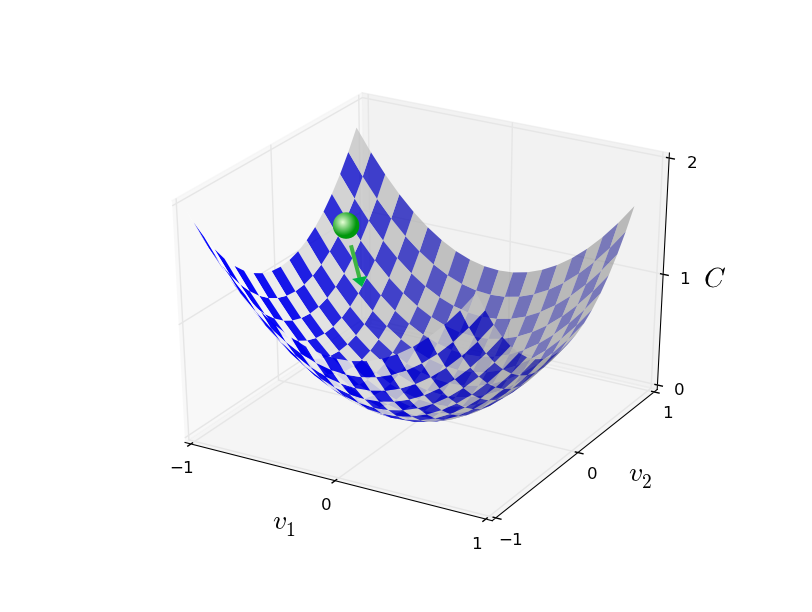


# Convolutional Neural Nets

**Winners of ImageNet challenge**

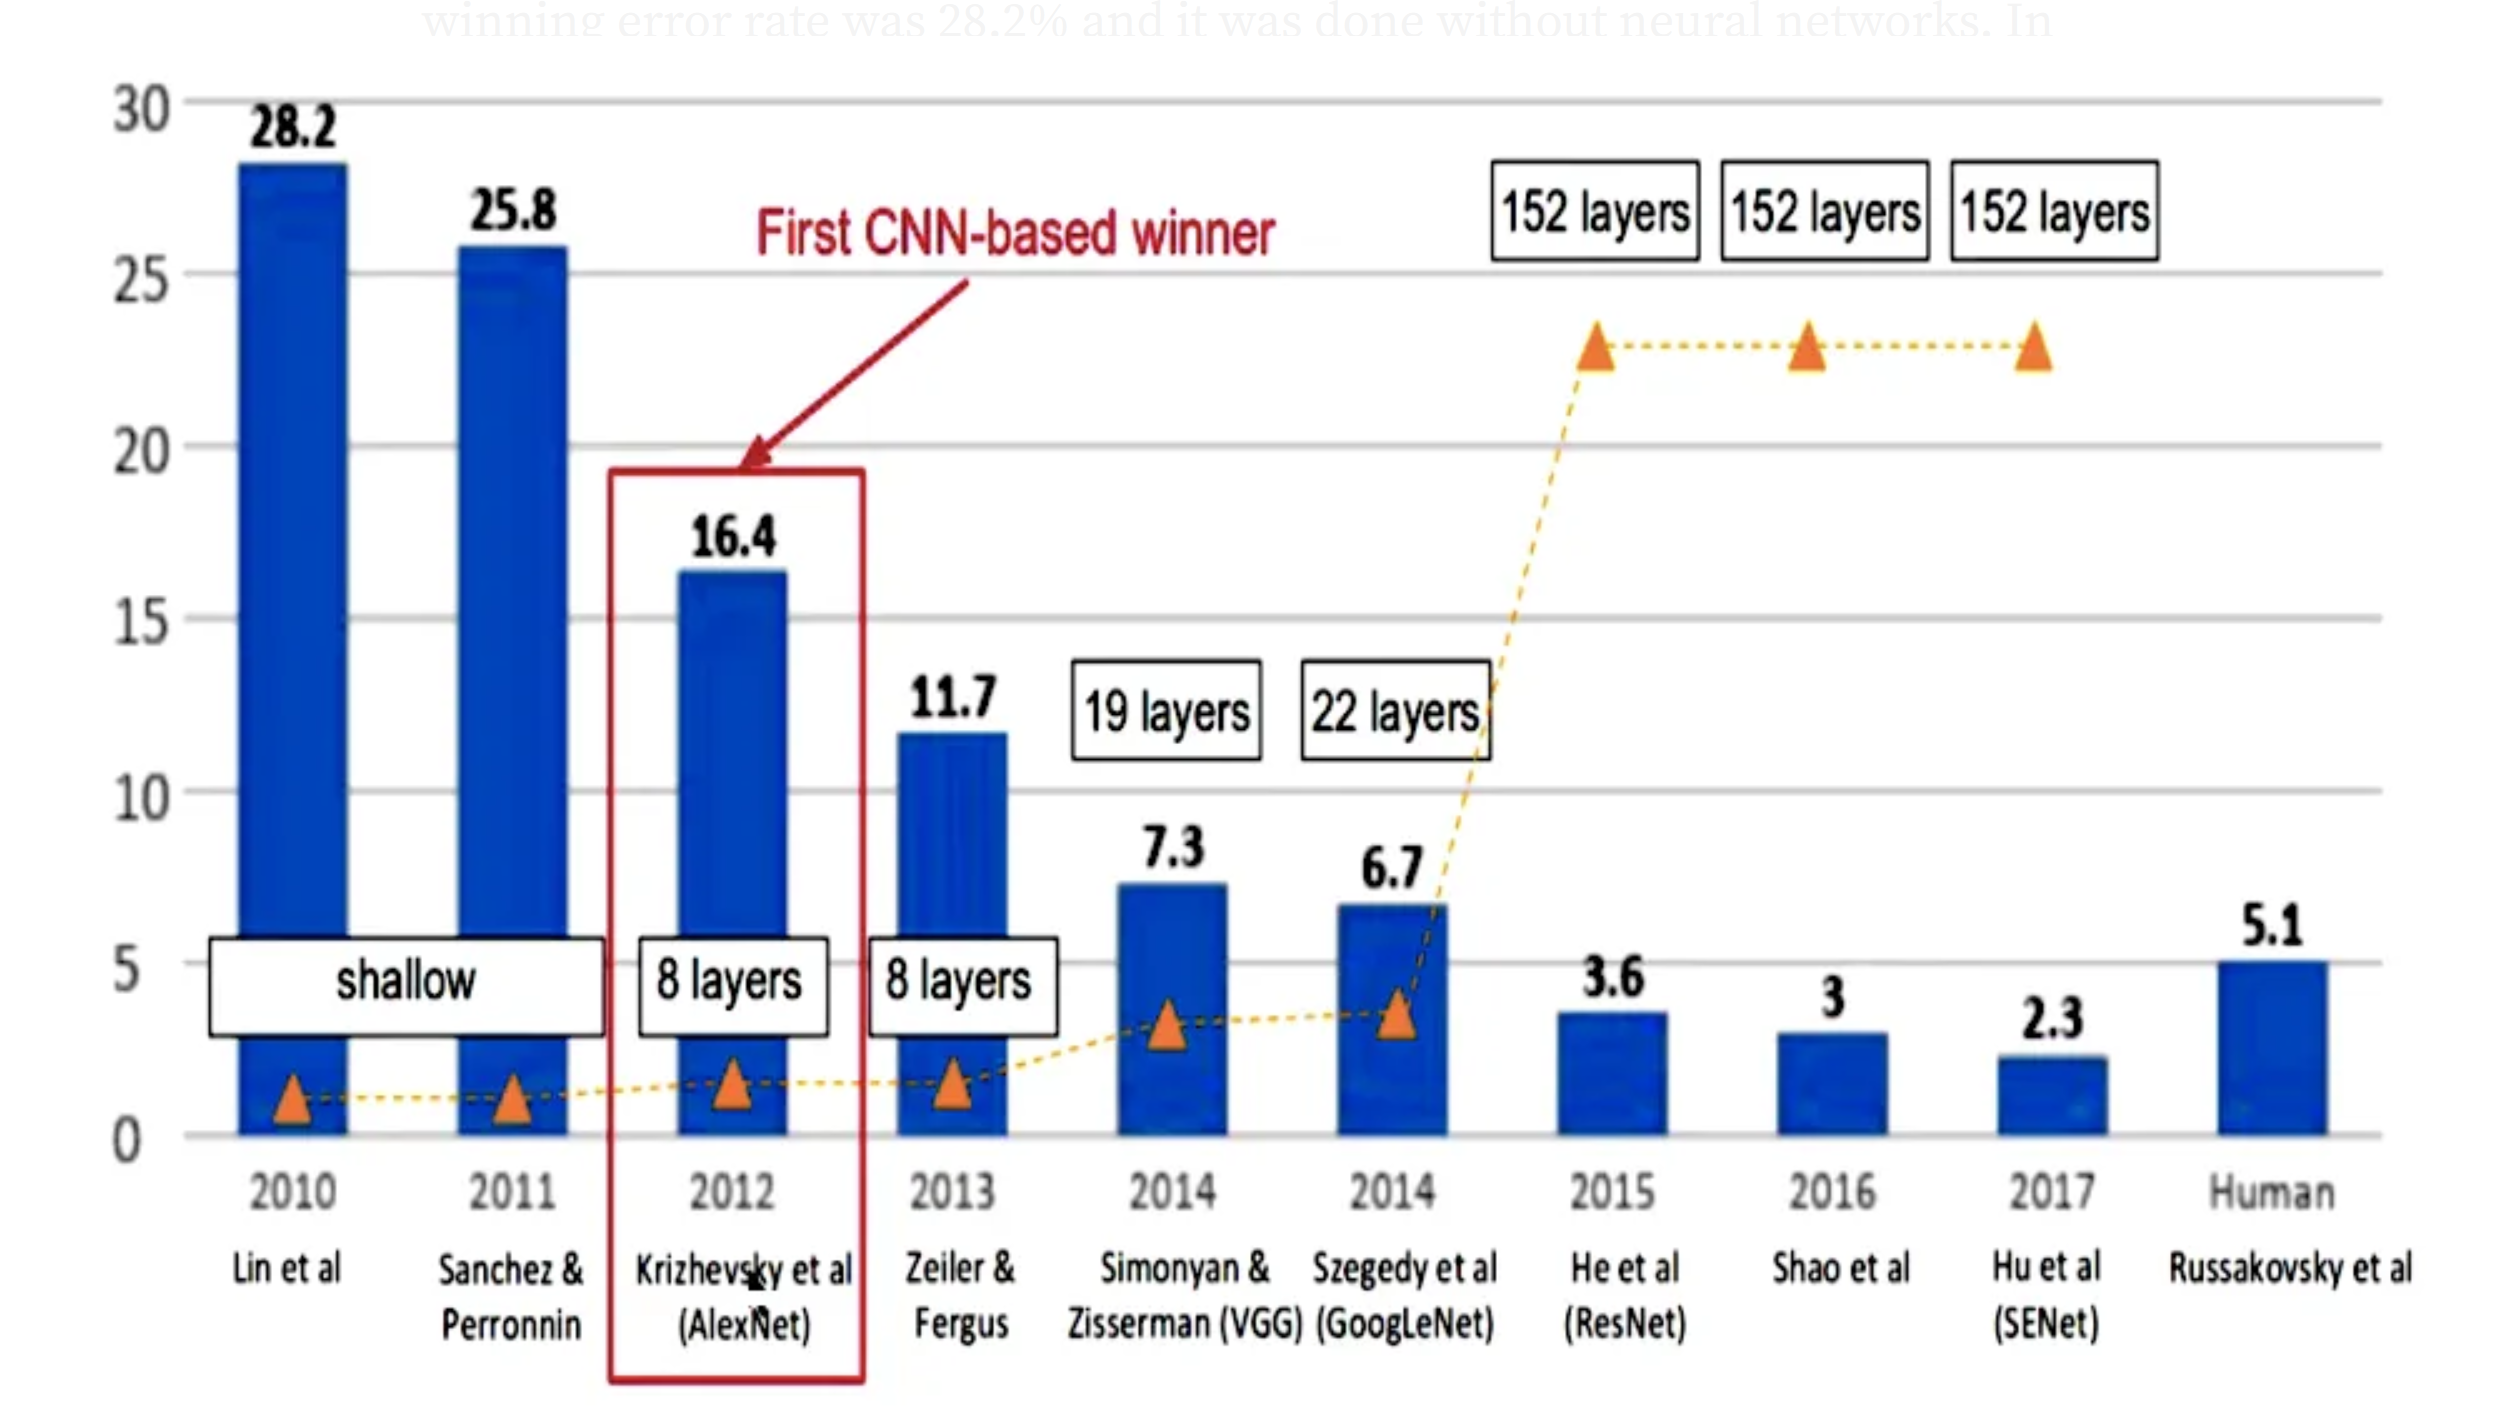

# Convolution Filters

A filter applies a *convolution kernel* to an image.  

The kernel is represented by an $n$x$n$ matrix where the target pixel is in the center.  

The output of the filter is the sum of the products of the matrix elements with the corresponding pixels.

Examples from [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)):

<table style="border: 0px solid black; text-align=center">
<tr><td><img src="https://upload.wikimedia.org/math/7/a/d/7ad9f1c26f76bc1ee55fdf0ef8c6197a.png"></td>
<td>
<img src="https://upload.wikimedia.org/math/3/0/c/30c42f667a353a5f0fbe92b0c4f2eee1.png">
</td>
<td>
<img src="https://upload.wikimedia.org/math/7/d/d/7ddb57480ef9fa57e2d1c2b3ffecb291.png">
</td>
</tr>
<tr><td>Identity</td><td>Blur</td><td>Edge Detection</td>
</table>

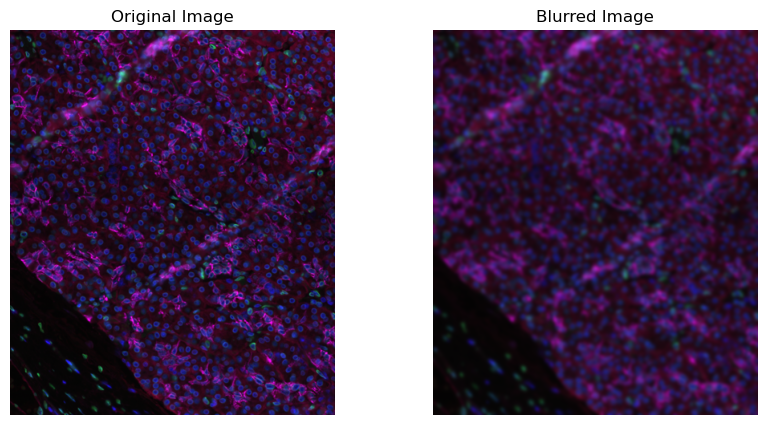

In [47]:
from skimage import io, img_as_float
from skimage.filters import gaussian, laplace
import matplotlib.pyplot as plt
import numpy as np

# Load the biological image (replace 'path_to_image.jpg' with your image path)
image_path = './files/bioimage.png'
original_image = img_as_float(io.imread(image_path))  # Convert image to float for processing

# Apply Gaussian blur using skimage
blurred_image = gaussian(original_image, sigma=2, channel_axis=2)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# Blurred Image
plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image)
plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0549019607843135..2.4627450980392154].


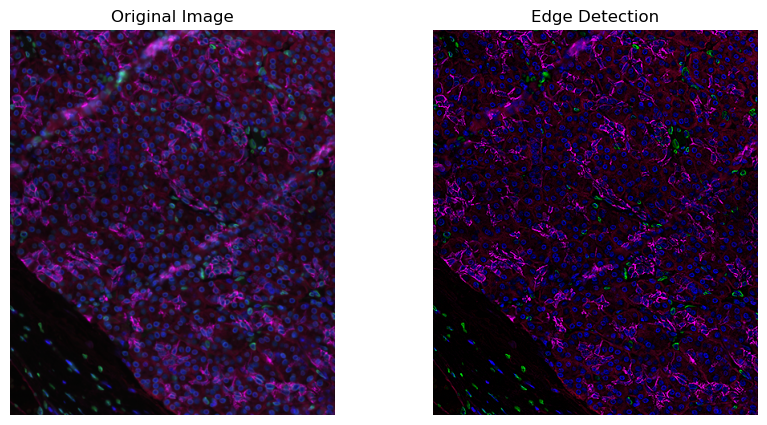

In [73]:
# Apply laplacian using skimage
blurred_image = laplace(original_image, ksize=3)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# Blurred Image
plt.subplot(1, 2, 2)
plt.title('Edge Detection')
plt.imshow(blurred_image)
plt.axis('off')

plt.show()

# Feature Maps

We can think of a kernel as identifying a *feature* in an image and the resulting image as a feature map that has high values (white) where the feature is present and low values (black) elsewhere.

*Feature maps retain the **spatial relationship** between features present in the original image.*


# Convolutional Layers

<img src="../files/conv.png" width="400" style="float:right"> A single kernel is applied across the input.  For each output feature map there is a single set of weights.

# Convolutional Layers

For images, each pixel is an input feature.  Each hidden layer is a set of feature maps.

<center><img src="../files/convLayers.png"></center>

# Pooling

Pooling layers apply a fixed convolution (usually the non-linear MAX kernel).  The kernel is usually applied with a *stride* to reduce the size of the layer.
 * faster to train
 * fewer parameters to fit
 * less sensitive to small changes (MAX)
<center><img src="../files/pooling.png"></center>

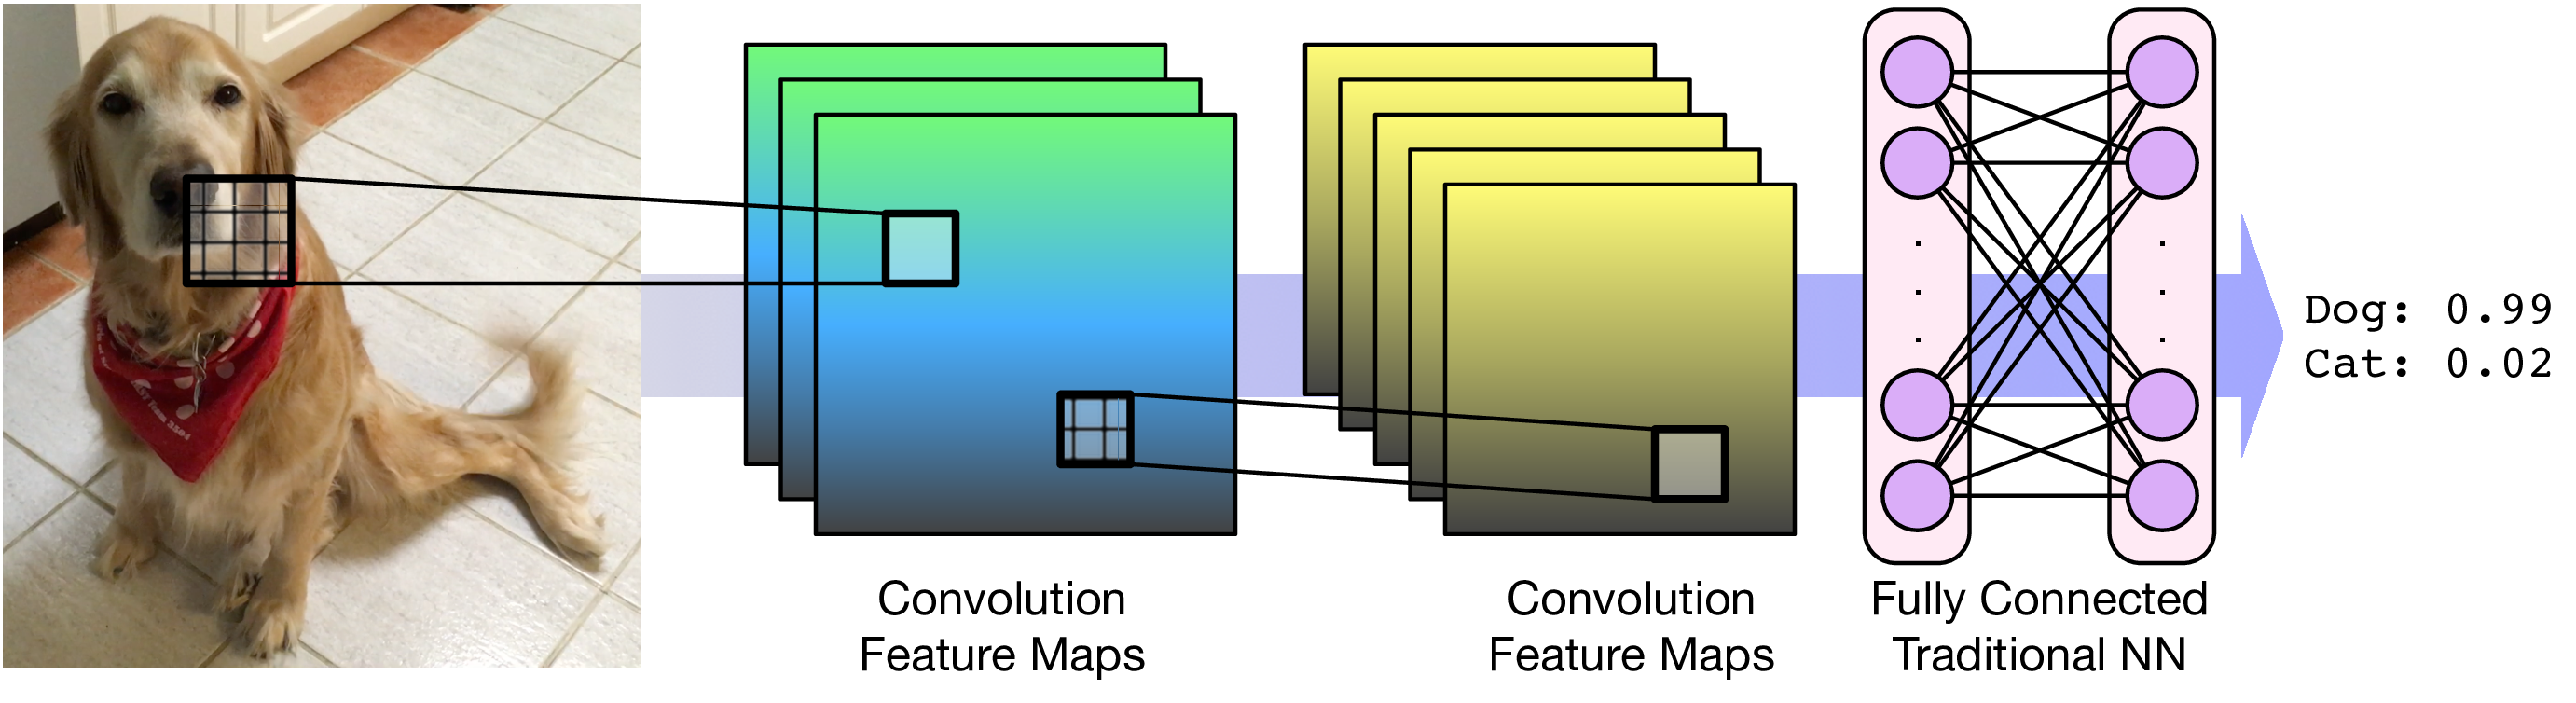
The last features maps are typically connected to one or more fully-connected layers to produce the desired output.

Consider an input image with 100 pixels.  In a classic neural network, we hook these pixels up to a hidden layer with 10 nodes.  In a CNN, we hook these pixels up to a convolutional layer with a 3x3 kernel and 10 output feature maps.

### Question: "Which network has more parameters to learn?",
- Classic
- CNN